In [158]:
!pip install emoji urlextract wordcloud


In [159]:
import pandas as pd
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
from collections import Counter
from urlextract import URLExtract
from wordcloud import WordCloud
from urllib.parse import urlparse


In [160]:
df = pd.read_csv("WhatsApp (1).csv", encoding='utf-8')

In [161]:
print(df)

                     user                                            message  \
0      group_notification  Messages and calls are end-to-end encrypted. N...   
1      group_notification  Group creator created group "JGEC MECH 2K17-21"\n   
2      group_notification                                   You were added\n   
3         +91 95648 92981                                    Keo clg jabi?\n   
4        +91 6296 534 775                                       Kobe bol??\n   
...                   ...                                                ...   
12407  group_notification                             +91 89420 95855 left\n   
12408     +91 79801 55092                          Clg e k k gli 8th aug??\n   
12409     +91 70742 49585                                        আমার আবেগ\n   
12410     +91 79801 55092                Sorry vailog.. nesha hoye g6ilo 😂\n   
12411     +91 70742 49585                                                🤣\n   

       year    month  day  hour  minute

In [162]:
import csv

data = []
with open('WhatsApp (1).csv', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        data.append(row)


In [163]:
print(data[:2])  # check first 2 rows


[['user', 'message', 'year', 'month', 'day', 'hour', 'minute'], ['group_notification', 'Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n', '2021', 'March', '27', '0', '0']]


In [164]:
# Print column names
print("Column Names:")
print(df.columns)

# Print shape
print("\nShape:")
print(df.shape)

# Print description
print("\nDescription:")
print(df.describe())

Column Names:
Index(['user', 'message', 'year', 'month', 'day', 'hour', 'minute'], dtype='object')

Shape:
(12412, 7)

Description:
               year           day          hour        minute
count  12412.000000  12412.000000  12412.000000  12412.000000
mean    2021.048421     16.075008     14.332823     29.663149
std        0.219120      8.192664      4.426757     17.922075
min     2018.000000      1.000000      0.000000      0.000000
25%     2021.000000     10.000000     11.000000     14.000000
50%     2021.000000     16.000000     13.000000     30.000000
75%     2021.000000     22.000000     18.000000     45.000000
max     2022.000000     31.000000     23.000000     59.000000


In [165]:
df.head();

In [166]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [167]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the CSV file
df = pd.read_csv("WhatsApp (1).csv")

# Replace NaN values in the 'message' column with empty strings
df['message'] = df['message'].fillna('')

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(text):
    return sid.polarity_scores(text)['compound']

# Apply sentiment analysis and add new columns
df['sentiment_score'] = df['message'].apply(get_sentiment_score)

# Function to get sentiment label
def get_sentiment_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment label and add new column
df['sentiment'] = df['sentiment_score'].apply(get_sentiment_label)

# Print updated dataframe
print(df.head())

                 user                                            message  \
0  group_notification  Messages and calls are end-to-end encrypted. N...   
1  group_notification  Group creator created group "JGEC MECH 2K17-21"\n   
2  group_notification                                   You were added\n   
3     +91 95648 92981                                    Keo clg jabi?\n   
4    +91 6296 534 775                                       Kobe bol??\n   

   year    month  day  hour  minute  sentiment_score sentiment  
0  2021    March   27     0       0           -0.296  Negative  
1  2018  January    8    16      43            0.250  Positive  
2  2018  January    8    16      43            0.000   Neutral  
3  2021    March   26    21      41            0.000   Neutral  
4  2021    March   26    21      46            0.000   Neutral  


In [168]:
df.dropna(inplace=True)
#df.drop(columns=['minutes'], inplace=True)




In [169]:
print(df.columns.tolist())


['user', 'message', 'year', 'month', 'day', 'hour', 'minute', 'sentiment_score', 'sentiment']


In [170]:
df

,user,message,year,month,day,hour,minute,sentiment_score,sentiment
0,group_notification,Messages and calls are end-to-end encrypted. N...,2021,March,27,0,0,-0.2960,Negative
1,group_notification,"Group creator created group ""JGEC MECH 2K17-21""\n",2018,January,8,16,43,0.2500,Positive
2,group_notification,You were added\n,2018,January,8,16,43,0.0000,Neutral
3,+91 95648 92981,Keo clg jabi?\n,2021,March,26,21,41,0.0000,Neutral
4,+91 6296 534 775,Kobe bol??\n,2021,March,26,21,46,0.0000,Neutral
...,...,...,...,...,...,...,...,...,...
12407,group_notification,+91 89420 95855 left\n,2022,August,7,21,41,0.0000,Neutral
12408,+91 79801 55092,Clg e k k gli 8th aug??\n,2022,August,7,22,2,0.0000,Neutral
12409,+91 70742 49585,আমার আবেগ\n,2022,August,7,22,15,0.0000,Neutral
12410,+91 79801 55092,Sorry vailog.. nesha hoye g6ilo 😂\n,2022,August,8,10,16,-0.0772,Negative


# Top 10 active users

/tmp/ipython-input-3540463312.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.values, y=top_users.index, palette="viridis")


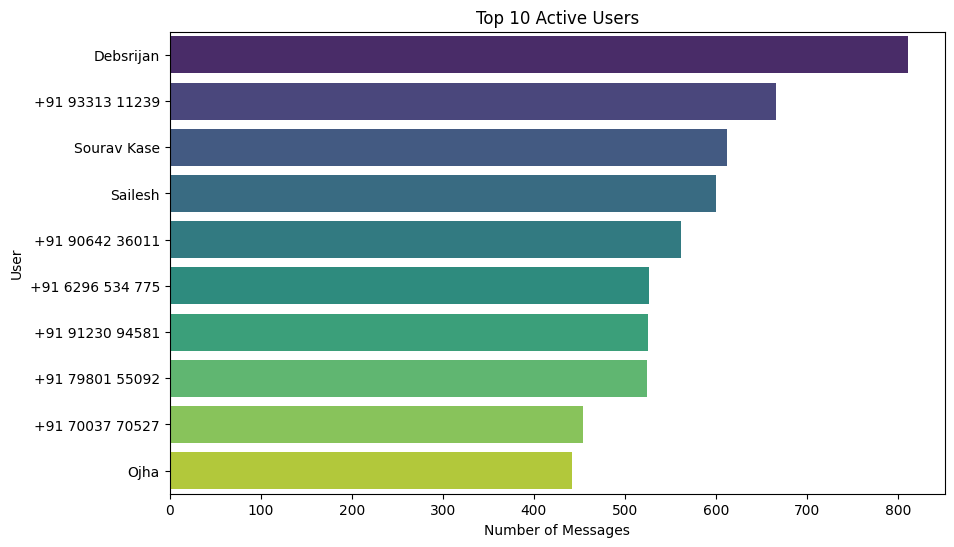

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is called df and user column is named 'user'
# Remove system messages
df_users = df[df['user'] != 'group_notification']

# Count messages per user
top_users = df_users['user'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_users.values, y=top_users.index, palette="viridis")
plt.xlabel("Number of Messages")
plt.ylabel("User")
plt.title("Top 10 Active Users")
plt.show()




# Most Used Emoji

In [172]:
# Create sender counts as a series
sender_count_series = df["user"].value_counts()
sender_count_series

,count
user,
Debsrijan,811
+91 93313 11239,666
Sourav Kase,612
Sailesh,600
+91 90642 36011,562
...,...
+91 98003 06935,2
+91 95474 72559,2
+91 70636 99840,2


In [173]:
print(df.columns.tolist())

['user', 'message', 'year', 'month', 'day', 'hour', 'minute', 'sentiment_score', 'sentiment']


In [174]:
emojis = []
users = sender_count_series.index

for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [175]:
a = pd.DataFrame(Counter(emojis).most_common(170))

In [176]:
a

,0,1
0,😂,691
1,🤣,552
2,❤,126
3,🏻,118
4,👍,114
...,...,...
165,🙀,1
166,🥶,1
167,📸,1
168,🏁,1


In [177]:
print(df.columns.tolist())

['user', 'message', 'year', 'month', 'day', 'hour', 'minute', 'sentiment_score', 'sentiment']


# Top popular emojis

In [178]:
# Assuming df is your DataFrame with columns: 'user', 'message'
emojis_by_user = {}

for index, row in df.iterrows():
    sender = row['user']
    message = row['message']

    emojis = [c for c in message if c in emoji.EMOJI_DATA]

    if sender not in emojis_by_user:
        emojis_by_user[sender] = emojis
    else:
        emojis_by_user[sender].extend(emojis)


user_to_analyze = 'Debsrijan'
user_emojis = emojis_by_user.get(user_to_analyze, [])

# Get the most common emojis used by the user
most_common_emojis = Counter(user_emojis).most_common(10)  # Change 10 to any desired number

# Display the result
print(f"Most common emojis used by {user_to_analyze}:")
most_common_emojis


Most common emojis used by Debsrijan:


[('😂', 25),
 ('🏾', 12),
 ('😑', 10),
 ('🥲', 10),
 ('😒', 7),
 ('🤩', 7),
 ('🙄', 5),
 ('👆', 4),
 ('😆', 4),
 ('🏻', 4)]

# Total Active users in months and weeks and years

In [179]:
monthData = df['month'].value_counts()
monthData

,count
month,
July,5060
April,2737
June,1359
September,650
May,640
March,596
August,507
December,473
January,138


<Axes: xlabel='month'>

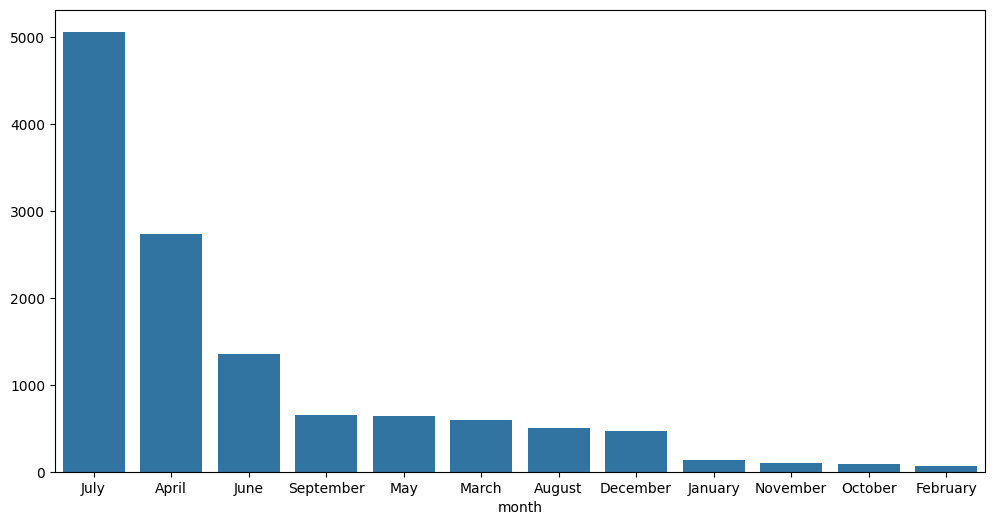

In [186]:

plt.figure(figsize=(12,6))
sns.barplot(x=monthData.index, y=monthData.values)
#

In [188]:
weekData = df['day'].value_counts()
weekData

,count
day,
22,990
16,968
20,765
13,726
14,659
24,638
5,637
19,556
8,549


<Axes: xlabel='day'>

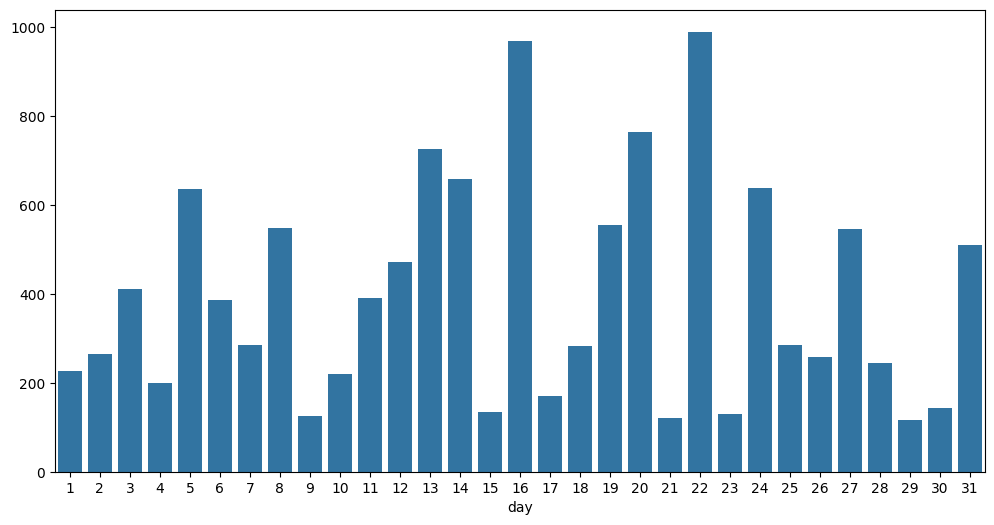

In [190]:
plt.figure(figsize=(12,6))
sns.barplot(x=weekData.index, y=weekData.values)

year  month    
2018  January         2
2021  April        2590
      August        502
      December      473
      July         5018
      June         1309
      March         523
      May           550
      November       96
      October        92
      September     650
2022  April         147
      August          5
      February       64
      January       136
      July           42
      June           50
      March          73
      May            90
Name: message, dtype: int64


<Axes: xlabel='year', ylabel='count'>

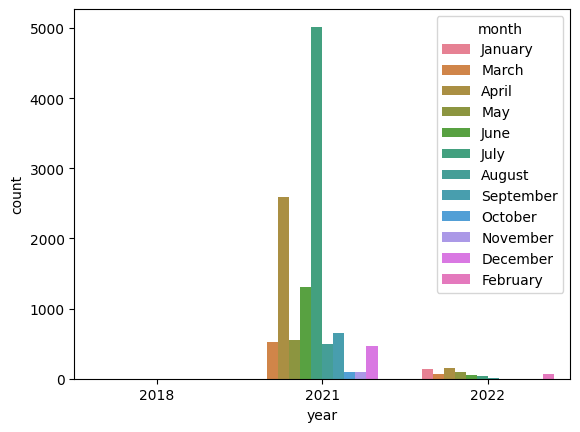

In [191]:
timeline = df.groupby(['year','month']).count()['message']
print(timeline)
sns.countplot(x='year', hue='month', data=df)

# StopWords

In [192]:
temp = df[df['user'] != 'group notification']
temp = temp[temp['message'] != '<Media omitted>\n']

In [194]:
f = open('stop_hinglish.txt')
stop_words = f.read()
print("stop words\n",stop_words)

stop words
 .
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
come

# WordCloud

In [195]:
words = ""
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words += word + ' '

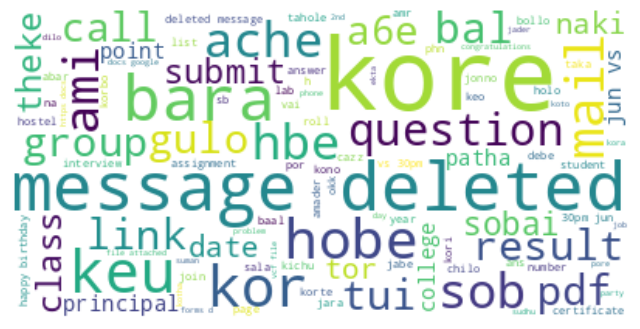

In [196]:
wordcloud = WordCloud(max_words=100, background_color="white").generate(words)

# Display the word cloud using Matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Domain

In [197]:
extractor = URLExtract()

links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))

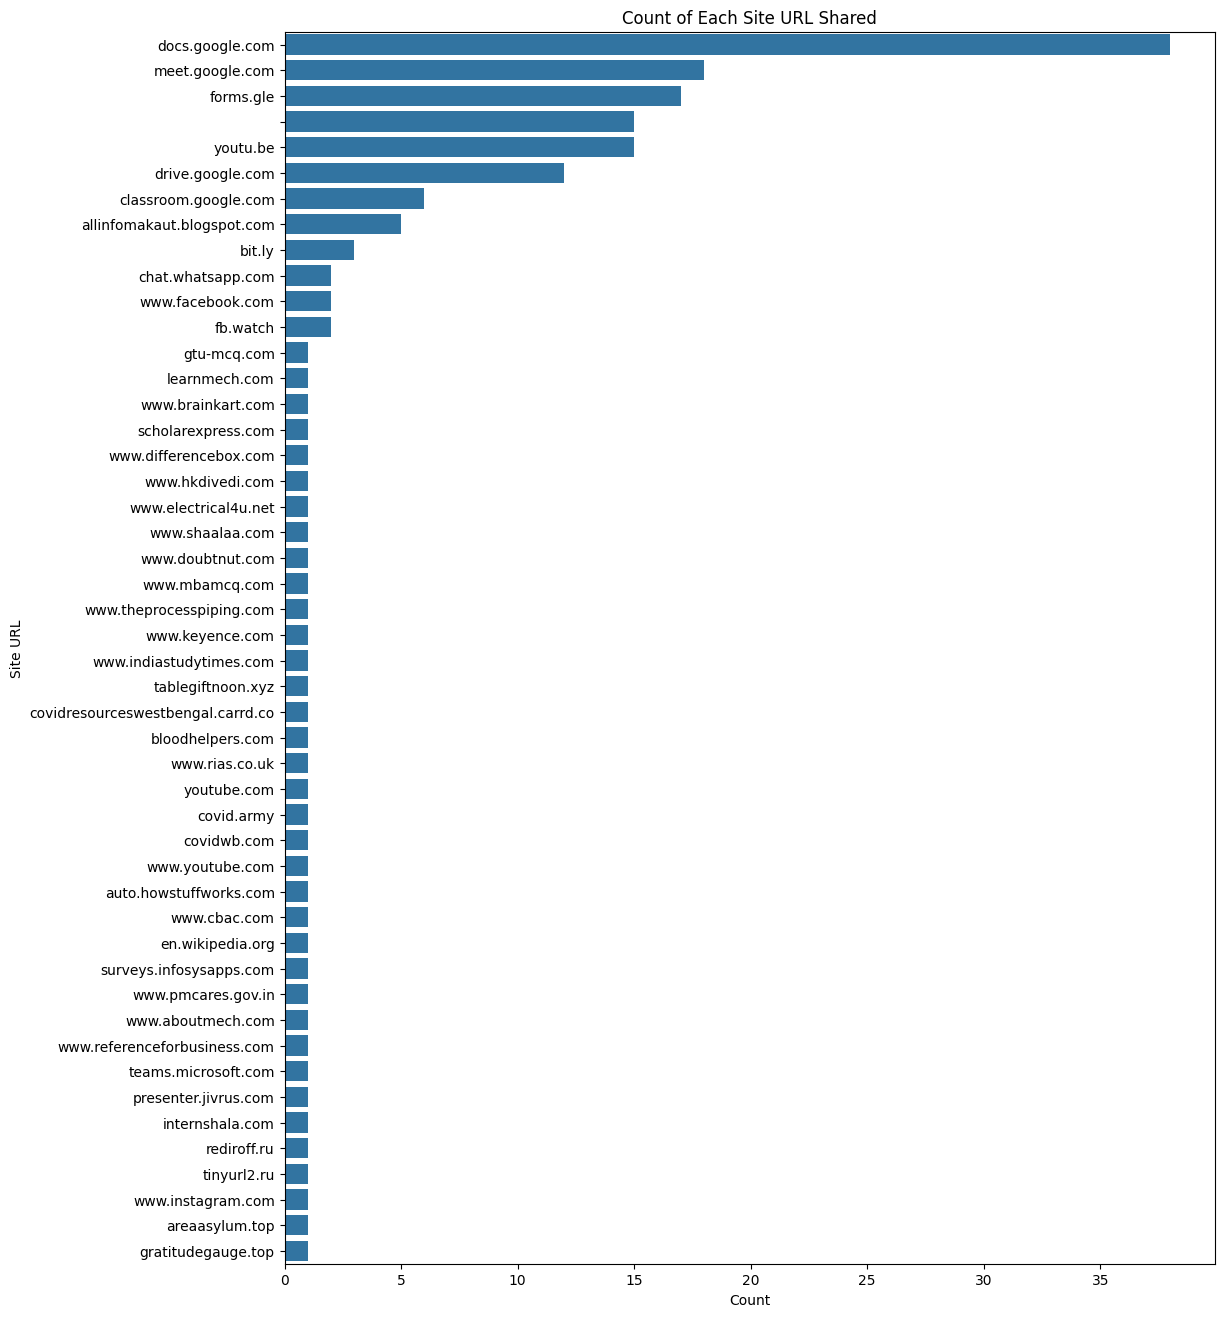

In [198]:
parsed_urls = [urlparse(url) for url in links]
domains = [parsed_url.netloc for parsed_url in parsed_urls]

# Create a DataFrame
df = pd.DataFrame({'Domain': domains})

# Create a countplot
plt.figure(figsize=(12, 16))
sns.countplot(y='Domain', data=df, order=df['Domain'].value_counts().index)
plt.title('Count of Each Site URL Shared')
plt.xlabel('Count')
plt.ylabel('Site URL')
plt.show()